# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import time
from scipy.stats import linregress

from pprint import pprint

# Import API key. Renamed mine
from api_keys_Yvonne import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [3]:
#Retrieve 5 cities
cities[0:5]

['dinghai', 'chiredzi', 'rikitea', 'bambous virieux', 'narsaq']

In [4]:
# Using: 06-Python-APIs,Day 2, Activities04, Stu_BurundiWeatherAppSolved

# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
#using farenheit
units = "imperial"

In [5]:
 # Build query URL and request your results in Farenheit
city = "yellowknife"
query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"

# Get weather data
weather_response = requests.get(query_url)
#good habit as 200 means it works 
print(weather_response.status_code)

weather_json = weather_response.json()

200


In [6]:
#see the data
pprint(weather_json)

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 62.456, 'lon': -114.3525},
 'dt': 1644132189,
 'id': 6185377,
 'main': {'feels_like': -30.48,
          'humidity': 69,
          'pressure': 1012,
          'temp': -17.88,
          'temp_max': -17.88,
          'temp_min': -17.88},
 'name': 'Yellowknife',
 'sys': {'country': 'CA',
         'id': 1007,
         'sunrise': 1644162697,
         'sunset': 1644191485,
         'type': 1},
 'timezone': -25200,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 140, 'speed': 9.22}}


In [7]:
#use csv to get the columns we want
city_name = weather_json["name"]
cloudiness = weather_json["clouds"]["all"]
country = weather_json["sys"]["country"]
date_cty = weather_json["dt"]
humidity = weather_json["main"]['humidity']
lat = weather_json["coord"]["lat"]
lng = weather_json["coord"]["lon"]
temp = weather_json["main"]['temp']
wind = weather_json["wind"]["speed"]
pressure = weather_json["main"]['pressure']

In [8]:
#test my outputs for different cities
humidity

69

In [9]:
#make my lists from above 
names = []
cloudys = []
countries = []
dates = []
humids = []
lats = []
lngs = []
temps = []
winds = []
pressures = []

#create loop to go through small count first  
for city in cities:
    
    #request
    print(city)
    
    # Build query URL and request your results in Farenheit
    query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"

    # Get weather data
    weather_response = requests.get(query_url)
    #good habit as 200 means it works 
    print(weather_response.status_code)
    #break up data with blank line
    print()
    
    #try catch
    try:
    
        #get data
        weather_json = weather_response.json()

        #use csv to get the columns we want
        city_name = weather_json["name"]
        cloudiness = weather_json["clouds"]["all"]
        country = weather_json["sys"]["country"]
        date_cty = weather_json["dt"]
        humidity = weather_json["main"]['humidity']
        lat = weather_json["coord"]["lat"]
        lng = weather_json["coord"]["lon"]
        temp = weather_json["main"]['temp']
        wind = weather_json["wind"]["speed"]
        pressure = weather_json["main"]['pressure']

        #now add them into lists
        names.append(city_name)
        cloudys.append(cloudiness)
        countries.append(country)
        dates.append(date_cty)
        humids.append(humidity)
        lats.append(lat)
        lngs.append(lng)
        temps.append(temp)
        winds.append(wind)
        pressures.append(pressure)
        
    except Exception as e:
        #where the error is
        print(e)
        
        # if there is no data for city replace with nan or none
        names.append(city)
        cloudys.append(np.nan)
        countries.append(None)
        dates.append(np.nan)
        humids.append(np.nan)
        lats.append(np.nan)
        lngs.append(np.nan)
        temps.append(np.nan)
        winds.append(np.nan)
        pressures.append(np.nan)
        
    time.sleep(1)

dinghai
200

chiredzi
200

rikitea
200

bambous virieux
200

narsaq
200

brae
200

pauini
200

redmond
200

bengkulu
200

ozu
200

nikolskoye
200

albany
200

ancud
200

lenki
404

'name'
castro
200

san pedro
200

illoqqortoormiut
404

'name'
kodiak
200

lorengau
200

tuktoyaktuk
200

bredasdorp
200

saint-leu
200

minab
200

chuy
200

dabhoi
200

odweyne
200

port elizabeth
200

marcona
404

'name'
tambun
200

hilo
200

atuona
200

bereda
200

hobart
200

bluff
200

wilmington
200

zhigansk
200

vaini
200

huari
200

college
200

taolanaro
404

'name'
yellowknife
200

port alfred
200

kapaa
200

mayna
200

kozhva
200

bato
200

georgetown
200

ushuaia
200

asau
200

attawapiskat
404

'name'
busselton
200

qaqortoq
200

cherskiy
200

hithadhoo
200

chernyshevskiy
200

cape town
200

raga
200

broome
200

duz
404

'name'
saskylakh
200

aketi
200

cidreira
200

tasiilaq
200

mount gambier
200

cagayan de tawi-tawi
404

'name'
ribeira grande
200

puerto ayora
200

port-cartier
200

inta


200

jinchengjiang
404

'name'
sabang
200

kokopo
200

waynesville
200

morro bay
200

decatur
200

gizo
200

presidencia roque saenz pena
200

evensk
200

malkangiri
200

sao gabriel da cachoeira
200

kirakira
200

charters towers
200

sola
200

leh
200

shakawe
200

taoudenni
200

santa ines
200

glenwood springs
200

vawkavysk
200

khormuj
404

'name'
ivankiv
200

bodden town
200

pestravka
200

knysna
200

san angelo
200

hami
200

hun
200

benghazi
200

requena
200

verkhovazhye
200

yeppoon
200

asheboro
200

broadstairs
200

bihariganj
200

denizli
200

warqla
404

'name'
dudinka
200

halalo
404

'name'
kuito
200

ahipara
200

erice
200

pitea
200

bathurst
200

itarema
200

adrar
200

rezekne
200

nanakuli
200

lasa
200

paso de los toros
200

alekseyevka
200

kununurra
200

sistranda
200

teguise
200

banepa
200

tumannyy
404

'name'
vysokogornyy
200

plouzane
200

tshikapa
200

gundlupet
200

lolua
404

'name'


In [12]:
df = pd.DataFrame()

df["City"] = names
df["Cloudiness"] = cloudys
df["Country"] = countries
df["Date"] = dates
df["Humidity %"] = humids
df["Latitude"] = lats
df["Longitude"] = lngs
df["Temperature (F)"] = temps
df["Wind_Speed"] = winds
df["Pressure"] = pressures

df.head()

,City,Cloudiness,Country,Date,Humidity %,Latitude,Longitude,Temperature (F),Wind_Speed,Pressure
0,Dinghaicun,100.0,CN,1.644132e+09,75.0,26.2847,119.7936,47.32,20.18,1026.0
1,Chiredzi,51.0,ZW,1.644132e+09,66.0,-21.0500,31.6667,76.95,12.44,1014.0
2,Rikitea,57.0,PF,1.644132e+09,71.0,-23.1203,-134.9692,79.09,17.00,1022.0
3,Bambous Virieux,75.0,MU,1.644132e+09,74.0,-20.3428,57.7575,84.45,18.41,1013.0
4,Narsaq,100.0,GL,1.644132e+09,71.0,60.9167,-46.0500,5.22,4.81,1002.0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 618 entries, 0 to 617
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   City             618 non-null    object 
 1   Cloudiness       568 non-null    float64
 2   Country          568 non-null    object 
 3   Date             568 non-null    float64
 4   Humidity %       568 non-null    float64
 5   Latitude         568 non-null    float64
 6   Longitude        568 non-null    float64
 7   Temperature (F)  568 non-null    float64
 8   Wind_Speed       568 non-null    float64
 9   Pressure         568 non-null    float64
dtypes: float64(8), object(2)
memory usage: 48.4+ KB


In [14]:
# want to remove null values

In [15]:
df.dropna(inplace=True)
df

,City,Cloudiness,Country,Date,Humidity %,Latitude,Longitude,Temperature (F),Wind_Speed,Pressure
0,Dinghaicun,100.0,CN,1.644132e+09,75.0,26.2847,119.7936,47.32,20.18,1026.0
1,Chiredzi,51.0,ZW,1.644132e+09,66.0,-21.0500,31.6667,76.95,12.44,1014.0
2,Rikitea,57.0,PF,1.644132e+09,71.0,-23.1203,-134.9692,79.09,17.00,1022.0
3,Bambous Virieux,75.0,MU,1.644132e+09,74.0,-20.3428,57.7575,84.45,18.41,1013.0
4,Narsaq,100.0,GL,1.644132e+09,71.0,60.9167,-46.0500,5.22,4.81,1002.0
...,...,...,...,...,...,...,...,...,...,...
611,Banepā,20.0,NP,1.644133e+09,44.0,27.6298,85.5214,57.52,3.44,1017.0
613,Vysokogornyy,100.0,RU,1.644133e+09,99.0,50.1167,139.1500,-4.61,4.34,1018.0
614,Plouzané,100.0,FR,1.644133e+09,90.0,48.3833,-4.6167,50.94,19.57,1021.0
615,Tshikapa,75.0,CD,1.644133e+09,72.0,-6.4167,20.8000,80.46,1.61,1013.0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 568 entries, 0 to 616
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   City             568 non-null    object 
 1   Cloudiness       568 non-null    float64
 2   Country          568 non-null    object 
 3   Date             568 non-null    float64
 4   Humidity %       568 non-null    float64
 5   Latitude         568 non-null    float64
 6   Longitude        568 non-null    float64
 7   Temperature (F)  568 non-null    float64
 8   Wind_Speed       568 non-null    float64
 9   Pressure         568 non-null    float64
dtypes: float64(8), object(2)
memory usage: 48.8+ KB


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [17]:
#Export the my city data into a .csv.
df.to_csv("yvonne_data.csv", index=False)

In [18]:
#Display the DataFrame. should be 601 cities
df

,City,Cloudiness,Country,Date,Humidity %,Latitude,Longitude,Temperature (F),Wind_Speed,Pressure
0,Dinghaicun,100.0,CN,1.644132e+09,75.0,26.2847,119.7936,47.32,20.18,1026.0
1,Chiredzi,51.0,ZW,1.644132e+09,66.0,-21.0500,31.6667,76.95,12.44,1014.0
2,Rikitea,57.0,PF,1.644132e+09,71.0,-23.1203,-134.9692,79.09,17.00,1022.0
3,Bambous Virieux,75.0,MU,1.644132e+09,74.0,-20.3428,57.7575,84.45,18.41,1013.0
4,Narsaq,100.0,GL,1.644132e+09,71.0,60.9167,-46.0500,5.22,4.81,1002.0
...,...,...,...,...,...,...,...,...,...,...
611,Banepā,20.0,NP,1.644133e+09,44.0,27.6298,85.5214,57.52,3.44,1017.0
613,Vysokogornyy,100.0,RU,1.644133e+09,99.0,50.1167,139.1500,-4.61,4.34,1018.0
614,Plouzané,100.0,FR,1.644133e+09,90.0,48.3833,-4.6167,50.94,19.57,1021.0
615,Tshikapa,75.0,CD,1.644133e+09,72.0,-6.4167,20.8000,80.46,1.61,1013.0


In [19]:
df.describe()

,Cloudiness,Date,Humidity %,Latitude,Longitude,Temperature (F),Wind_Speed,Pressure
count,568.000000,5.680000e+02,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000
mean,57.963028,1.644133e+09,72.417254,21.668177,21.254912,48.802694,8.321250,1014.301056
std,41.226441,2.561235e+02,21.540254,32.464964,88.792164,31.765314,6.378504,10.471555
min,0.000000,1.644131e+09,11.000000,-54.800000,-175.200000,-39.680000,0.000000,968.000000
25%,11.750000,1.644132e+09,62.000000,-3.836550,-56.103300,26.680000,3.440000,1009.000000
50%,75.000000,1.644133e+09,76.000000,26.225450,26.789300,56.735000,6.910000,1014.000000
75%,100.000000,1.644133e+09,89.000000,48.277175,100.340125,75.255000,11.510000,1022.000000
max,100.000000,1.644133e+09,100.000000,78.218600,179.316700,107.440000,31.030000,1037.000000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [20]:
#  Get the indices of cities that have humidity over 100%.
#using .describe I can see what the max humidty is in my data set. if its 100% then that means there is not any cities over 100%
data_humidity = df["Humidity %"].describe()
data_humidity


count    568.000000
mean      72.417254
std       21.540254
min       11.000000
25%       62.000000
50%       76.000000
75%       89.000000
max      100.000000
Name: Humidity %, dtype: float64

In [21]:
#  Get the indices of cities that have humidity over 100%.
print(f" There are no cities that have humidity over 100%")

 There are no cities that have humidity over 100%


In [22]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
print(f"I can use by current data frame since I did not have to drop humidity outliers")

I can use by current data frame since I did not have to drop humidity outliers


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [30]:
df.columns

Index(['City', 'Cloudiness', 'Country', 'Date', 'Humidity %', 'Latitude',
       'Longitude', 'Temperature (F)', 'Wind_Speed', 'Pressure'],
      dtype='object')

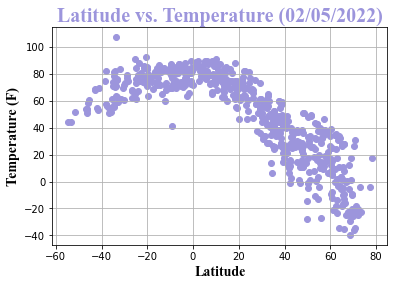

In [31]:
#plot my scatter plot using Latitude vs. Temperature
plt.scatter(df["Latitude"],df["Temperature (F)"],color="#9C95DC",marker="o",linewidths=1)

plt.xlabel('Latitude',fontsize = 14,fontweight = "bold",fontname="Times New Roman")
plt.ylabel('Temperature (F)',fontsize = 14,fontweight = "bold",fontname="Times New Roman")
plt.title('Latitude vs. Temperature (02/05/2022)',fontsize = 20, fontweight = "bold",fontname="Times New Roman", color = "#9C95DC")
plt.grid(True)
#Save the plotted figures as .pngs
plt.savefig("FIG 1.Temperature (F) vs. Latitude.png")

In [32]:
#After each plot, add a sentence or two explaining what the code is analyzing.
print(f" The scatter plot above is comparing latitude versus temperature in all cities. Values shows that as latitude increases the temperature decreases.")

 The scatter plot above is comparing latitude versus temperature in all cities. Values shows that as latitude increases the temperature decreases.


## Latitude vs. Humidity Plot

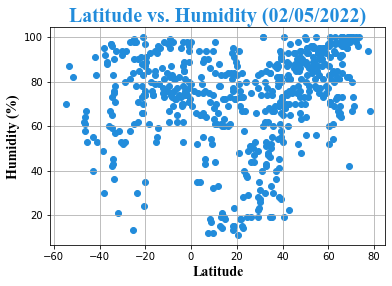

In [33]:
#plot my scatter plot using Latitude vs. Humidity
plt.scatter(df["Latitude"],df["Humidity %"],color="#228CDB",marker="o",linewidths=1)

plt.xlabel('Latitude',fontsize = 14,fontweight = "bold",fontname="Times New Roman")
plt.ylabel('Humidity (%)',fontsize = 14,fontweight = "bold",fontname="Times New Roman")
plt.title('Latitude vs. Humidity (02/05/2022)',fontsize = 20, fontweight = "bold",fontname="Times New Roman", color = "#228CDB")
plt.grid(True)
#Save the plotted figures as .pngs
plt.savefig("FIG 2.Humidity (%) vs. Latitude.png")

In [34]:
#After each plot, add a sentence or two explaining what the code is analyzing.
print(f" The scatter plot above is comparing latitude versus temperature in all cities. We can see that all cities have some humidity and there does not seem to be a relationship.")

 The scatter plot above is comparing latitude versus temperature in all cities. We can see that all cities have some humidity and there does not seem to be a relationship.


## Latitude vs. Cloudiness Plot

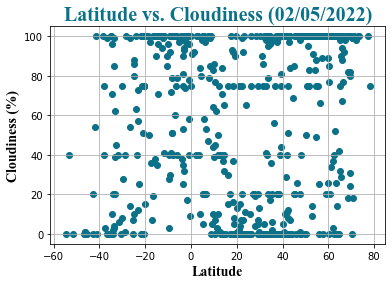

In [36]:
#plot my scatter plot using Latitude vs. Cloudiness
plt.scatter(df["Latitude"],df["Cloudiness"],color="#0B7189",marker="o",linewidths=1)

plt.xlabel('Latitude',fontsize = 14,fontweight = "bold",fontname="Times New Roman")
plt.ylabel('Cloudiness (%)',fontsize = 14,fontweight = "bold",fontname="Times New Roman")
plt.title('Latitude vs. Cloudiness (02/05/2022)',fontsize = 20, fontweight = "bold",fontname="Times New Roman", color = "#0B7189")
plt.grid(True)
#Save the plotted figures as .pngs
plt.savefig("FIG 3.Cloudiness (%) vs. Latitude.png")

In [37]:
#After each plot, add a sentence or two explaining what the code is analyzing.
print(f" The scatter plot above is comparing latitude versus cloudiness in all cities. There does not seem to be a relationship between the two. ")

 The scatter plot above is comparing latitude versus cloudiness in all cities. There does not seem to be a relationship between the two. 


## Latitude vs. Wind Speed Plot

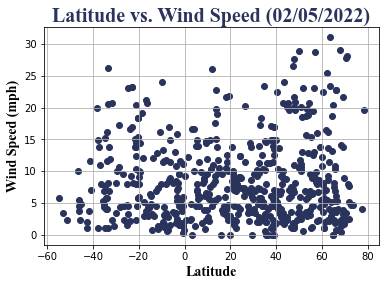

In [38]:
#plot my scatter plot using Latitude vs. Cloudiness
plt.scatter(df["Latitude"],df["Wind_Speed"],color="#29335C",marker="o",linewidths=1)

plt.xlabel('Latitude',fontsize = 14,fontweight = "bold",fontname="Times New Roman")
plt.ylabel('Wind Speed (mph)',fontsize = 14,fontweight = "bold",fontname="Times New Roman")
plt.title('Latitude vs. Wind Speed (02/05/2022)',fontsize = 20, fontweight = "bold",fontname="Times New Roman", color = "#29335C")
plt.grid(True)
#Save the plotted figures as .pngs
plt.savefig("FIG 4.Wind Speed (mph) vs. Latitude.png")

In [39]:
#After each plot, add a sentence or two explaining what the code is analyzing.
print(f" The scatter plot above is comparing latitude versus wind speed in all cities. There does not seem to be a relationship between the two, but most cities are below 25 mph. ")

 The scatter plot above is comparing latitude versus wind speed in all cities. There does not seem to be a relationship between the two, but most cities are below 25 mph. 


## Linear Regression

In [40]:
#separate the plots into Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude)

In [41]:
#create northern and southern df for below plots
north_df = df.loc[(df['Latitude'] > 0)]
south_df =df.loc[(df['Latitude'] < 0)]

In [42]:
north_df

,City,Cloudiness,Country,Date,Humidity %,Latitude,Longitude,Temperature (F),Wind_Speed,Pressure
0,Dinghaicun,100.0,CN,1.644132e+09,75.0,26.2847,119.7936,47.32,20.18,1026.0
4,Narsaq,100.0,GL,1.644132e+09,71.0,60.9167,-46.0500,5.22,4.81,1002.0
5,Brae,77.0,GB,1.644132e+09,60.0,60.3964,-1.3530,39.11,22.39,979.0
7,Redmond,98.0,US,1.644132e+09,88.0,47.6740,-122.1215,38.70,1.01,1032.0
9,Ōzu,79.0,JP,1.644132e+09,47.0,33.5000,132.5500,40.62,18.32,1023.0
...,...,...,...,...,...,...,...,...,...,...
610,Teguise,20.0,ES,1.644133e+09,77.0,29.0605,-13.5640,61.02,13.80,1017.0
611,Banepā,20.0,NP,1.644133e+09,44.0,27.6298,85.5214,57.52,3.44,1017.0
613,Vysokogornyy,100.0,RU,1.644133e+09,99.0,50.1167,139.1500,-4.61,4.34,1018.0
614,Plouzané,100.0,FR,1.644133e+09,90.0,48.3833,-4.6167,50.94,19.57,1021.0


In [43]:
south_df

,City,Cloudiness,Country,Date,Humidity %,Latitude,Longitude,Temperature (F),Wind_Speed,Pressure
1,Chiredzi,51.0,ZW,1.644132e+09,66.0,-21.0500,31.6667,76.95,12.44,1014.0
2,Rikitea,57.0,PF,1.644132e+09,71.0,-23.1203,-134.9692,79.09,17.00,1022.0
3,Bambous Virieux,75.0,MU,1.644132e+09,74.0,-20.3428,57.7575,84.45,18.41,1013.0
6,Pauini,100.0,BR,1.644132e+09,98.0,-7.7136,-66.9764,71.22,0.69,1010.0
8,Bengkulu,100.0,ID,1.644132e+09,69.0,-3.8004,102.2655,81.84,10.87,1009.0
...,...,...,...,...,...,...,...,...,...,...
600,Bathurst,39.0,AU,1.644133e+09,71.0,-33.4166,149.5806,62.96,1.01,1023.0
601,Itarema,94.0,BR,1.644133e+09,85.0,-2.9248,-39.9167,76.96,7.36,1010.0
606,Paso de los Toros,45.0,UY,1.644133e+09,94.0,-32.8167,-56.5167,59.47,11.86,1012.0
608,Kununurra,100.0,AU,1.644133e+09,79.0,-15.7667,128.7333,84.18,4.61,1005.0


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7720533628484325


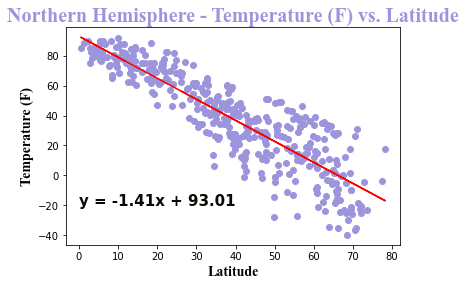

In [57]:
#linear regression model like in class activity day 3 act 9

x_values = north_df['Latitude']
y_values = north_df['Temperature (F)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,marker="o",color="#9C95DC")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,-20),fontsize=15,color="#0A0903",fontweight = "bold")
plt.xlabel('Latitude',fontsize = 14,fontweight = "bold",fontname="Times New Roman")
plt.ylabel('Temperature (F)',fontsize = 14,fontweight = "bold",fontname="Times New Roman")
plt.title('Northern Hemisphere - Temperature (F) vs. Latitude',fontsize = 20, fontweight = "bold",fontname="Times New Roman", color = "#9C95DC")
print(f"The r-squared is: {rvalue**2}")
#Save the plotted figures as .pngs
plt.savefig("FIG 5.Northern Hemisphere - Temperature (F) vs. Latitude.png")
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.2938178010094531


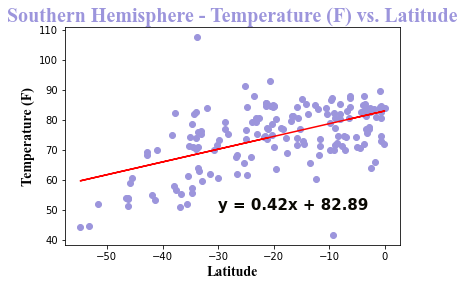

In [58]:
#linear regression model like in class activity day 3 act 9

x_values = south_df['Latitude']
y_values = south_df['Temperature (F)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,marker="o",color="#9C95DC")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,50),fontsize=15,color="#0A0903",fontweight = "bold")
plt.xlabel('Latitude',fontsize = 14,fontweight = "bold",fontname="Times New Roman")
plt.ylabel('Temperature (F)',fontsize = 14,fontweight = "bold",fontname="Times New Roman")
plt.title('Southern Hemisphere - Temperature (F) vs. Latitude',fontsize = 20, fontweight = "bold",fontname="Times New Roman", color = "#9C95DC")
print(f"The r-squared is: {rvalue**2}")
#Save the plotted figures as .pngs
plt.savefig("FIG 6.Southern Hemisphere - Temperature (F) vs. Latitude.png")
plt.show()


In [46]:
#After each pair of plots, take the time to explain what the linear regression is modeling. For example, describe any relationships you notice and any other analysis you may have.
print(f" Comparing linear regression from both hemispheres, the northern hemisphere has a negative correlation and the southern has a positive. In other words temperature is higher closer to 0 latitude (equator.) ")

 Comparing linear regression from both hemispheres, the northern hemisphere has a negative correlation and the southern has a positive. In other words temperature is higher closer to 0 latitude (equator.) 


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.22672092980777533


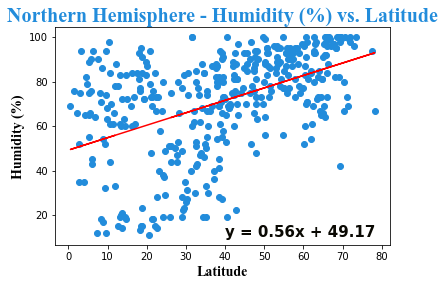

In [59]:
#linear regression model like in class activity day 3 act 9

x_values = north_df['Latitude']
y_values = north_df['Humidity %']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,marker="o",color="#228CDB")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="#0A0903",fontweight = "bold")
plt.xlabel('Latitude',fontsize = 14,fontweight = "bold",fontname="Times New Roman")
plt.ylabel('Humidity (%)',fontsize = 14,fontweight = "bold",fontname="Times New Roman")
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude',fontsize = 20, fontweight = "bold",fontname="Times New Roman", color = "#228CDB")
print(f"The r-squared is: {rvalue**2}")
#Save the plotted figures as .pngs
plt.savefig("FIG 7.Northern Hemisphere - Humidity (%) vs. Latitude.png")
plt.show()


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.059840204062452086


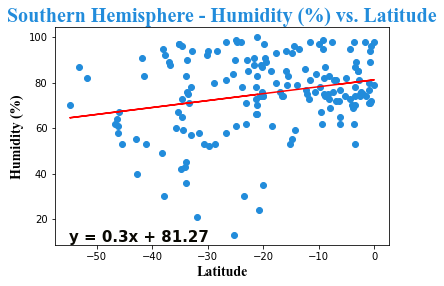

In [60]:
#linear regression model like in class activity day 3 act 9

x_values = south_df['Latitude']
y_values = south_df['Humidity %']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,marker="o",color="#228CDB")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,10),fontsize=15,color="#0A0903",fontweight = "bold")
plt.xlabel('Latitude',fontsize = 14,fontweight = "bold",fontname="Times New Roman")
plt.ylabel('Humidity (%)',fontsize = 14,fontweight = "bold",fontname="Times New Roman")
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude',fontsize = 20, fontweight = "bold",fontname="Times New Roman", color = "#228CDB")
print(f"The r-squared is: {rvalue**2}")
#Save the plotted figures as .pngs
plt.savefig("FIG 8.Southern Hemisphere - Humidity (%) vs. Latitude.png")
plt.show()


In [49]:
#After each pair of plots, take the time to explain what the linear regression is modeling. For example, describe any relationships you notice and any other analysis you may have.
print(f" Comparing linear regression from both hemispheres, both hemisphere do not display a positive correlation for humidity. ")

 Comparing linear regression from both hemispheres, both hemisphere do not display a positive correlation for humidity. 


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.10456182917915968


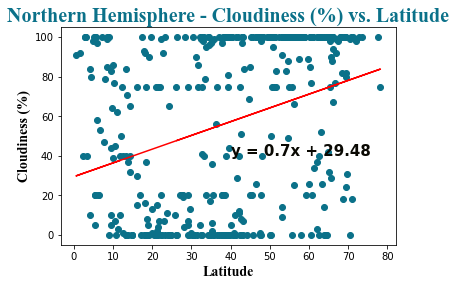

In [61]:
#linear regression model like in class activity day 3 act 9

x_values = north_df['Latitude']
y_values = north_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,marker="o",color="#0B7189")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,40),fontsize=15,color="#0A0903",fontweight = "bold")
plt.xlabel('Latitude',fontsize = 14,fontweight = "bold",fontname="Times New Roman")
plt.ylabel('Cloudiness (%)',fontsize = 14,fontweight = "bold",fontname="Times New Roman")
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude',fontsize = 20, fontweight = "bold",fontname="Times New Roman", color = "#0B7189")
print(f"The r-squared is: {rvalue**2}")
#Save the plotted figures as .pngs
plt.savefig("FIG 9.Northern Hemisphere - Cloudiness (%) vs. Latitude.png")
plt.show()


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.23343093631858713


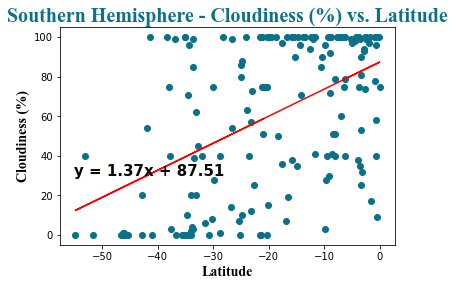

In [62]:
#linear regression model like in class activity day 3 act 9

x_values = south_df['Latitude']
y_values = south_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,marker="o",color="#0B7189")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,30),fontsize=15,color="#0A0903",fontweight = "bold")
plt.xlabel('Latitude',fontsize = 14,fontweight = "bold",fontname="Times New Roman")
plt.ylabel('Cloudiness (%)',fontsize = 14,fontweight = "bold",fontname="Times New Roman")
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude',fontsize = 20, fontweight = "bold",fontname="Times New Roman", color = "#0B7189")
print(f"The r-squared is: {rvalue**2}")
#Save the plotted figures as .pngs
plt.savefig("FIG 10.Southern Hemisphere - Cloudiness (%) vs. Latitude.png")
plt.show()


In [52]:
#After each pair of plots, take the time to explain what the linear regression is modeling. For example, describe any relationships you notice and any other analysis you may have.
print(f" Comparing linear regression from both hemispheres, both hemisphere do not display a strong correlation for cloudiness. ")

 Comparing linear regression from both hemispheres, both hemisphere do not display a strong correlation for cloudiness. 


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.004810853628823305


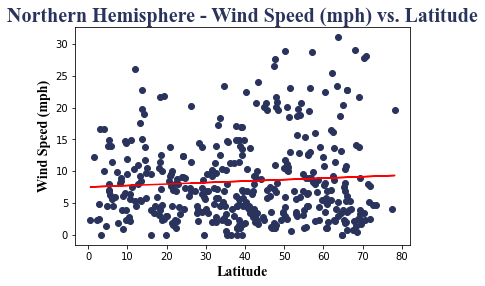

In [63]:
#linear regression model like in class activity day 3 act 9

x_values = north_df['Latitude']
y_values = north_df['Wind_Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,marker="o",color="#29335C")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,35),fontsize=15,color="#0A0903",fontweight = "bold")
plt.xlabel('Latitude',fontsize = 14,fontweight = "bold",fontname="Times New Roman")
plt.ylabel('Wind Speed (mph)',fontsize = 14,fontweight = "bold",fontname="Times New Roman")
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude',fontsize = 20, fontweight = "bold",fontname="Times New Roman", color = "#29335C")
print(f"The r-squared is: {rvalue**2}")
#Save the plotted figures as .pngs
plt.savefig("FIG 11.Northern Hemisphere - Wind Speed (mph) vs. Latitude.png")
plt.show()


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.00955584489862488


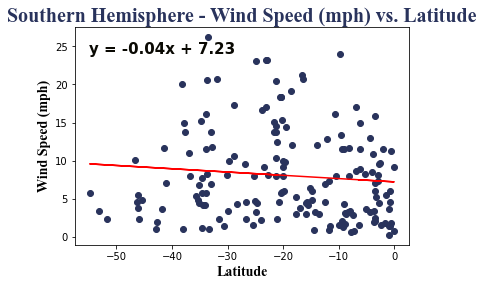

In [64]:
#linear regression model like in class activity day 3 act 9

x_values = south_df['Latitude']
y_values = south_df['Wind_Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,marker="o",color="#29335C")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,24),fontsize=15,color="#0A0903",fontweight = "bold")
plt.xlabel('Latitude',fontsize = 14,fontweight = "bold",fontname="Times New Roman")
plt.ylabel('Wind Speed (mph)',fontsize = 14,fontweight = "bold",fontname="Times New Roman")
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude',fontsize = 20, fontweight = "bold",fontname="Times New Roman", color = "#29335C")
print(f"The r-squared is: {rvalue**2}")
#Save the plotted figures as .pngs
plt.savefig("FIG 12.Southern Hemisphere - Wind Speed (mph) vs. Latitude.png")
plt.show()


In [55]:
#After each pair of plots, take the time to explain what the linear regression is modeling. For example, describe any relationships you notice and any other analysis you may have.
print(f" Comparing linear regression from both hemispheres, both hemisphere do not display a strong correlation for wind speed. ")

 Comparing linear regression from both hemispheres, both hemisphere do not display a strong correlation for wind speed. 


In [56]:
#For Part I, you must include a written description of three observable trends based on the data.

print(f"Observation 1: One very obvious observation is the relationship between latitude and tempertures in both hemispheres. Temperature is higher closer to equator.")


print(f"Observation 2: Refering to the scatterplot Latitude vs. Wind Speed Plot, most cities are under 20pmh from random selected cities. We are not able to see a true correlation.")


print(f"Observation 3: Refering to the Latitude vs. Cloudiness Plot, we cannot make conclusions of correlation due to variability from random selected cities.")

Observation 1: One very obvious observation is the relationship between latitude and tempertures in both hemispheres. Temperature is higher closer to equator.
Observation 2: Refering to the scatterplot Latitude vs. Wind Speed Plot, most cities are under 20pmh from random selected cities. We are not able to see a true correlation.
Observation 3: Refering to the Latitude vs. Cloudiness Plot, we cannot make conclusions of correlation due to variability from random selected cities.
